In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

RANDOM_STATE = 83

In [2]:
df = pd.read_csv('Data in Table S6 of the Supporting Information')
data = df.values
X = data[:, :11]
Y = data[:, 11:]

print("Original Y shape:", Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=RANDOM_STATE)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Missing values in x_train:", np.isnan(x_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())

model = MultiOutputRegressor(Ridge(random_state=RANDOM_STATE))
model.fit(x_train, y_train)

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)


print(f"Metrics train:\n\t MSR: {mean_squared_error(y_train, train_predictions):.4f} \n\t MAR: {mean_absolute_error(y_train, train_predictions):.4f} \n\t R2: {r2_score(y_train, train_predictions):.4f}")
print(f"Metrics test:\n\t MSR: {mean_squared_error(y_test, test_predictions):.4f} \n\t MAR: {mean_absolute_error(y_test, test_predictions):.4f} \n\t R2: {r2_score(y_test, test_predictions):.4f}")

Original Y shape: (35, 4)
Missing values in x_train: 0
Missing values in y_train: 0
Metrics train:
	 MSR: 0.3272 
	 MAR: 0.4407 
	 R2: 0.7353
Metrics test:
	 MSR: 0.3002 
	 MAR: 0.4412 
	 R2: 0.4830


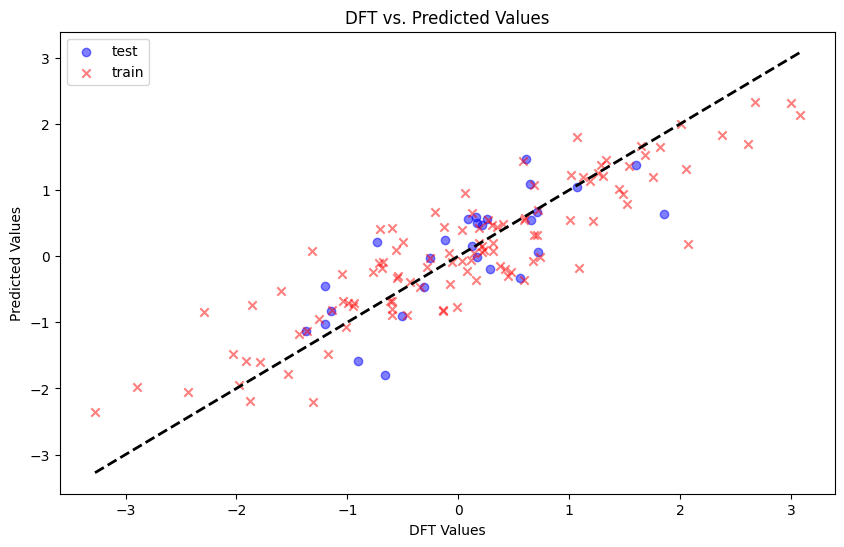

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, train_predictions, alpha=0.5, color='red', label='train', marker='x')
plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()

y_test:
-1.3744868 0.1617459 0.7146299 0.709111
0.2616552 -1.1458221 1.6036669 -0.5085
-0.3106448 0.1226279 0.6537749 -0.254758
0.2903862 -1.2025181 1.8543999 -0.731268
-1.1996728 0.6446019 0.5562999 0.209771
0.1697882 -0.1203471 -0.9061961 1.067755
0.1658962 0.0909879 -0.6573451 0.611461
test_predictions:
-1.1272760907996293 0.5977571099854875 0.06804840426498776 0.6724705765491539
0.556515829778041 -0.8228785101903492 1.3836468919220923 -0.9062842115097834
-0.46977703267322257 0.1539981049498111 0.5501949529860426 -0.02341602526263087
-0.1942282179163436 -0.4538660334921927 0.6421208072852354 0.21697344412330105
-1.0268804092565362 1.09259721579064 -0.3332496282787773 0.47853282174467404
0.5039544382733272 0.25019517072004616 -1.588704464906487 1.0455548559131138
-0.019468924992727565 0.5578369375668868 -1.7934337454129392 1.4660657328387803
y_train:
-2.4359258 0.4752969 -0.2079941 2.379623
0.3088602 -0.5954531 1.2639609 -0.766368
0.0340962 1.8146939 -1.0404931 -0.597297
-0.0580658 0

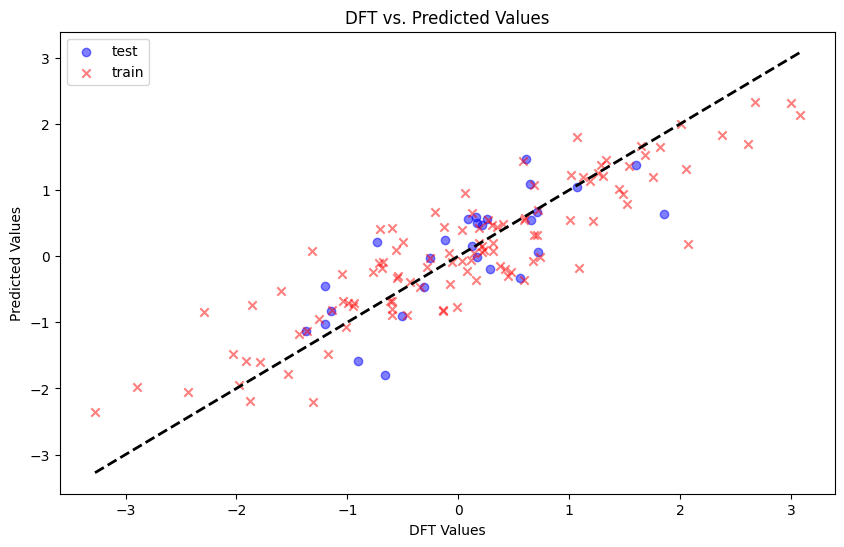

In [4]:
def print_no_brackets(array):
    for item in array:
        print(' '.join(map(str, item)))

print("y_test:")
print_no_brackets(y_test)

print("test_predictions:")
print_no_brackets(test_predictions)

print("y_train:")
print_no_brackets(y_train)

print("train_predictions:")
print_no_brackets(train_predictions)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5, color='blue', label='test', marker='o')
plt.scatter(y_train, train_predictions, alpha=0.5, color='red', label='train', marker='x')

plt.xlabel("DFT Values")
plt.ylabel("Predicted Values")
plt.title("DFT vs. Predicted Values")
plt.legend()

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.show()